In [1]:
import numpy as np

print(np.logspace(-4.5, -3.5, num=3, base=10))
print(np.logspace(-4.5, -3.5, num=3, base=10))

[3.16227766e-05 1.00000000e-04 3.16227766e-04]
[3.16227766e-05 1.00000000e-04 3.16227766e-04]


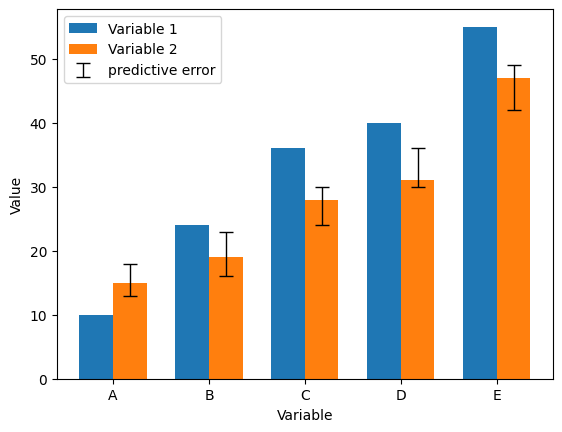

In [2]:
import sys
sys.path.append("../")
from plotting.plotting_helpers import two_variable_bar_plot
labels = ['A', 'B', 'C', 'D', 'E']
variable1 = [10, 24, 36, 40, 55]
variable2 = [15, 19, 28, 31, 47]
error_min = [2, 3, 4, 1, 5]  # Minimum error values
error_max = [3, 4, 2, 5, 2]  # Maximum error values
fig, ax = two_variable_bar_plot(labels, variable1, variable2, error_min_2=error_min, error_max_2=error_max, error_labels=('','predictive error'))
fig.show()

In [3]:
import pandas as pd

arr1 = [1, 2, 3, 4, 5]
arr2 = ['a', 'b', 'c', 'd', 'e']

df = pd.DataFrame({'Array 1': arr1, 'Array 2': arr2})

filename = 'data.csv'

# Save DataFrame to CSV file with header
df.to_csv(filename, index=False)

print(f"Data has been successfully saved to {filename}.")



Data has been successfully saved to data.csv.


In [4]:
import numpy as np
import sys
sys.path.append("../")
#from metrics.covariance_metric_helpers import compute_cov_metric, compute_empirical_cov

def compute_empirical_cov(samples : np.ndarray, mean : np.ndarray):
    """
    Computes covariance matrix from samples from distribution X and mean
    Assumes a square covariance matrix
    """
    n = samples.shape[0]
    d = samples.shape[1]
    Qn = np.zeros((d, d))
    for s in samples:
        Qn += np.outer((s - mean), (s - mean))
    return 1/n * Qn

cov = np.eye(3)
samples = np.random.multivariate_normal(np.zeros(3), cov, 1000)

print(compute_empirical_cov(samples, np.zeros(3)))

[[ 0.94807415 -0.03792397  0.02796284]
 [-0.03792397  0.96153696  0.00481332]
 [ 0.02796284  0.00481332  0.9760893 ]]


In [5]:
def apply_averaging_filter(arr, filter_range):
    filtered_arr = []
    for i in range(len(arr)):
        if i == 0:
            filtered_arr.append(arr[0])
        else:
            start_index = max(0, i - filter_range + 1)
            end_index = i + 1
            filtered_value = sum(arr[start_index:end_index]) / filter_range
            filtered_arr.append(filtered_value)
    return filtered_arr

# Example usage
input_array = [1, 2, 3, 4, 5, 6, 7, 8, 9]
filter_range = 2
filtered_array = apply_averaging_filter(input_array, filter_range)
print(filtered_array)

[1, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]


In [6]:
print(input_array[0:0])

[]


In [7]:
import pandas as pd
predictions = pd.read_csv('../test_samples/nn/ls_pred.csv').to_numpy()
print(predictions.shape)

(200, 4128)


In [8]:
import pandas as pd
import numpy as np
import sys

sys.path.append('../')
from neural_net.get_data import get_test_data
from utils.helper_functions import subsample
from plotting.plotting_helpers import two_variable_bar_plot

# get test data
x_test, y_test = get_test_data('../configs/nn_config.ini')
n_test = x_test.shape[0]

# get predictions
predictive_samples = pd.read_csv('../test_samples/nn/ls_pred.csv').to_numpy()
net_predictions = pd.read_csv('../test_samples/nn/ls_pred_net_predictions.csv')["predictions"]

# get errors from a selection of predictive samples
num_ll_samples = predictive_samples.shape[0]
num_samples = 25
idx = subsample(x_test.shape[0], x_test.shape[0]/num_samples)
true_y = np.squeeze(y_test[idx])
errors = np.resize(net_predictions[idx], (num_ll_samples, num_samples)) - predictive_samples[:,idx]
min_errors = np.zeros(num_samples)
max_errors = np.zeros(num_samples)
for i in range(num_samples):
    min_errors[i] = np.abs(np.min(errors[:,i]))
    max_errors[i] = np.abs(np.max(errors[:,i]))

# generate plot
labels = [f"x{i}" for i in idx]
fig, ax = two_variable_bar_plot(
    labels, 
    true_y, 
    net_predictions[idx], 
    error_min_2=min_errors, 
    error_max_2=max_errors, 
    xlabel='Network Inputs', 
    ylabel='Outputs', 
    var_labels=('Actual', 'Network Prediction'), 
    error_labels=('','Predictive Error')
)

FileNotFoundError: [Errno 2] No such file or directory: 'data/x_test.csv'

0.6053923517465591
0.9435049287974835
0.6656333802169875
0.869800599403061


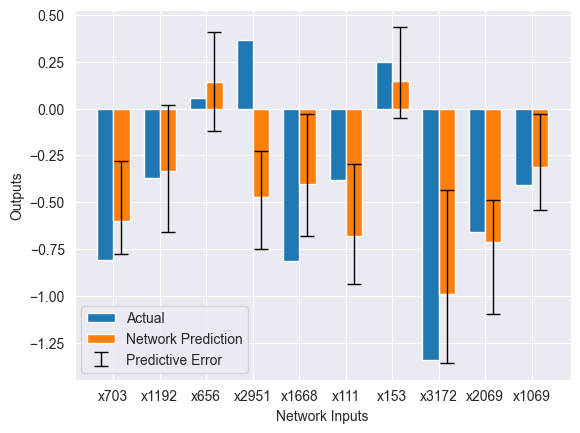

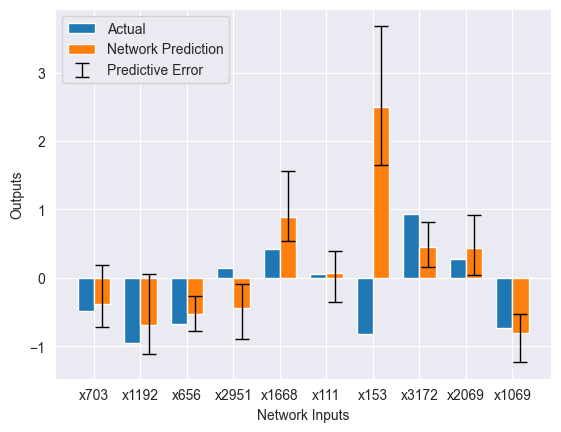

In [ ]:
import numpy as np
import seaborn as sns
import sys
sys.path.append('../')

from neural_net.get_data import get_training_data, get_test_data

sns.set_style('darkgrid')

x_train, y_train = get_training_data('../configs/nn_config.ini')
x_test, y_test = get_test_data('../configs/nn_config.ini')

# split test data into those inside and outside 1 std deviation from mean for each dimension
x_mean = np.mean(x_train, axis=0)
x_var = np.var(x_train, axis=0)
upper = x_mean + np.sqrt(x_var)
lower = x_mean - np.sqrt(x_var)
upper_truth = [all(x_test[i] < upper) for i in range(x_test.shape[0])]
lower_truth = [all(x_test[i] > lower) for i in range(x_test.shape[0])]
truth = np.logical_and(upper_truth, lower_truth)
x_test_inner, y_test_inner = x_test[truth], y_test[truth].squeeze(-1)
x_test_outer, y_test_outer = x_test[np.logical_not(truth)], y_test[np.logical_not(truth)].squeeze(-1)

# get predictive samples
predictive_samples = pd.read_csv('../test_samples/nn/ls_pred_50000.csv').to_numpy().T
predictive_samples_inner = predictive_samples[truth]
predictive_samples_outer = predictive_samples[np.logical_not(truth)]

# get net predictions
net_predictions = pd.read_csv('../test_samples/nn/ls_pred_50000_net_predictions.csv')["predictions"].to_numpy()
net_predictions_inner = net_predictions[truth]
net_predictions_outer = net_predictions[np.logical_not(truth)]

# get number of ll samples & set number of variables to show
num_ll_samples = predictive_samples_inner.shape[-1]
num_display_data = 10

# subsample inner data
idx = subsample(x_test_inner.shape[0], x_test_inner.shape[0]/num_display_data)
net_predictions_inner_sub = net_predictions_inner[idx]
y_test_inner_sub = y_test_inner[idx]
predictive_samples_inner_sub = predictive_samples_inner[idx]

# subsample outer data
idx = subsample(x_test_outer.shape[0], x_test_outer.shape[0]/num_display_data)
net_predictions_outer_sub = net_predictions_outer[idx]
y_test_outer_sub = y_test_outer[idx]
predictive_samples_outer_sub = predictive_samples_outer[idx]

# set inner errors
inner_errors = np.resize(net_predictions_inner_sub, (num_ll_samples, num_display_data)) - predictive_samples_inner_sub.T
inner_min_errors = np.zeros(num_display_data)
inner_max_errors = np.zeros(num_display_data)
for i in range(num_display_data):
    inner_min_errors[i] = np.abs(np.min(inner_errors[:,i]))
    inner_max_errors[i] = np.abs(np.max(inner_errors[:,i]))

# set outer errors
outer_errors = np.resize(net_predictions_outer_sub, (num_ll_samples, num_display_data)) - predictive_samples_outer_sub.T
outer_min_errors = np.zeros(num_display_data)
outer_max_errors = np.zeros(num_display_data)
for i in range(num_display_data):
    outer_min_errors[i] = np.abs(np.min(outer_errors[:,i]))
    outer_max_errors[i] = np.abs(np.max(outer_errors[:,i]))
    
# set full outer errors
outer_errors_full = np.resize(net_predictions_outer, (num_ll_samples, predictive_samples_outer.shape[0])) - predictive_samples_outer.T
outer_min_errors_full = np.zeros(predictive_samples_outer.shape[0])
outer_max_errors_full = np.zeros(predictive_samples_outer.shape[0])
for i in range(predictive_samples_outer.shape[0]):
    outer_min_errors_full[i] = np.abs(np.min(outer_errors_full[:,i]))
    outer_max_errors_full[i] = np.abs(np.max(outer_errors_full[:,i]))

# set full inner errors
inner_errors_full = np.resize(net_predictions_inner, (num_ll_samples, predictive_samples_inner.shape[0])) - predictive_samples_inner.T
inner_min_errors_full = np.zeros(predictive_samples_inner.shape[0])
inner_max_errors_full = np.zeros(predictive_samples_inner.shape[0])
for i in range(predictive_samples_inner.shape[0]):
    inner_min_errors_full[i] = np.abs(np.min(inner_errors_full[:,i]))
    inner_max_errors_full[i] = np.abs(np.max(inner_errors_full[:,i]))
    
# generate inner plot
labels = [f"x{i}" for i in idx]
fig, ax = two_variable_bar_plot(
    labels, 
    y_test_inner_sub, 
    net_predictions_inner_sub, 
    error_min_2=inner_min_errors, 
    error_max_2=inner_max_errors, 
    xlabel='Network Inputs', 
    ylabel='Outputs', 
    var_labels=('Actual', 'Network Prediction'), 
    error_labels=('','Predictive Error')
)

# generate outer plot
labels = [f"x{i}" for i in idx]
fig, ax = two_variable_bar_plot(
    labels, 
    y_test_outer_sub, 
    net_predictions_outer_sub, 
    error_min_2=outer_min_errors, 
    error_max_2=outer_max_errors, 
    xlabel='Network Inputs', 
    ylabel='Outputs', 
    var_labels=('Actual', 'Network Prediction'), 
    error_labels=('','Predictive Error')
)

print(np.mean(np.abs(inner_max_errors + inner_min_errors)))
print(np.mean(np.abs(outer_max_errors + outer_min_errors)))
print(np.mean(np.abs(inner_max_errors_full + inner_min_errors_full)))
print(np.mean(np.abs(outer_max_errors_full + outer_min_errors_full)))

0.9809251427650452
1.5282898671925067
1.1323088912273709
1.5610093417425204


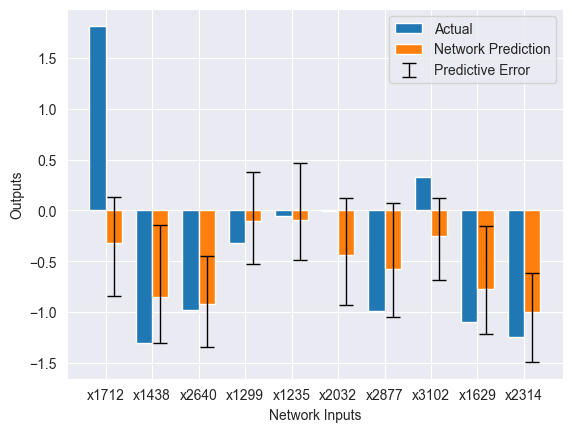

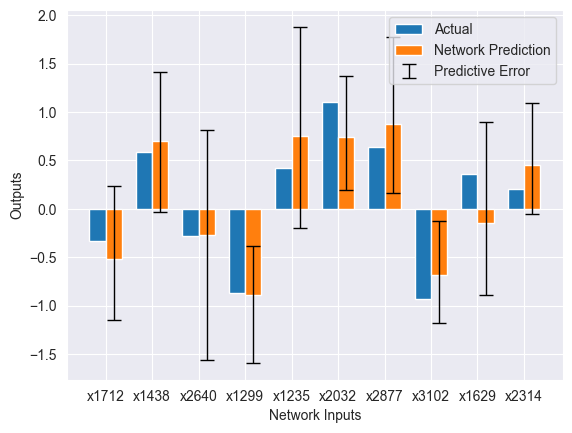

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import sys
sys.path.append('../')

from neural_net.get_data import get_training_data, get_test_data
from utils.helper_functions import subsample
from plotting.plotting_helpers import two_variable_bar_plot

sns.set_style('darkgrid')

x_train, y_train = get_training_data('../configs/nn_config.ini')
x_test, y_test = get_test_data('../configs/nn_config.ini')

# split test data into those inside and outside 1 std deviation from mean for each dimension
x_mean = np.mean(x_train, axis=0)
x_var = np.var(x_train, axis=0)
upper = x_mean + np.sqrt(x_var)
lower = x_mean - np.sqrt(x_var)
upper_truth = [all(x_test[i] < upper) for i in range(x_test.shape[0])]
lower_truth = [all(x_test[i] > lower) for i in range(x_test.shape[0])]
truth = np.logical_and(upper_truth, lower_truth)
x_test_inner, y_test_inner = x_test[truth], y_test[truth].squeeze(-1)
x_test_outer, y_test_outer = x_test[np.logical_not(truth)], y_test[np.logical_not(truth)].squeeze(-1)

# get predictive samples
predictive_samples = pd.read_csv('../test_samples/nn/sghmc_pred.csv').to_numpy().T
predictive_samples_inner = predictive_samples[truth]
predictive_samples_outer = predictive_samples[np.logical_not(truth)]

# get net predictions
net_predictions = pd.read_csv('../test_samples/nn/sghmc_pred_net_predictions.csv')["predictions"].to_numpy()
net_predictions_inner = net_predictions[truth]
net_predictions_outer = net_predictions[np.logical_not(truth)]

# get number of ll samples & set number of variables to show
num_ll_samples = predictive_samples_inner.shape[-1]
num_display_data = 10

# subsample inner data
idx = subsample(x_test_inner.shape[0], x_test_inner.shape[0]/num_display_data)
net_predictions_inner_sub = net_predictions_inner[idx]
y_test_inner_sub = y_test_inner[idx]
predictive_samples_inner_sub = predictive_samples_inner[idx]

# subsample outer data
idx = subsample(x_test_outer.shape[0], x_test_outer.shape[0]/num_display_data)
net_predictions_outer_sub = net_predictions_outer[idx]
y_test_outer_sub = y_test_outer[idx]
predictive_samples_outer_sub = predictive_samples_outer[idx]

# set inner errors
inner_errors = np.resize(net_predictions_inner_sub, (num_ll_samples, num_display_data)) - predictive_samples_inner_sub.T
inner_min_errors = np.zeros(num_display_data)
inner_max_errors = np.zeros(num_display_data)
for i in range(num_display_data):
    inner_min_errors[i] = np.abs(np.min(inner_errors[:,i]))
    inner_max_errors[i] = np.abs(np.max(inner_errors[:,i]))

# set outer errors
outer_errors = np.resize(net_predictions_outer_sub, (num_ll_samples, num_display_data)) - predictive_samples_outer_sub.T
outer_min_errors = np.zeros(num_display_data)
outer_max_errors = np.zeros(num_display_data)
for i in range(num_display_data):
    outer_min_errors[i] = np.abs(np.min(outer_errors[:,i]))
    outer_max_errors[i] = np.abs(np.max(outer_errors[:,i]))
    
# set full outer errors
outer_errors_full = np.resize(net_predictions_outer, (num_ll_samples, predictive_samples_outer.shape[0])) - predictive_samples_outer.T
outer_min_errors_full = np.zeros(predictive_samples_outer.shape[0])
outer_max_errors_full = np.zeros(predictive_samples_outer.shape[0])
for i in range(predictive_samples_outer.shape[0]):
    outer_min_errors_full[i] = np.abs(np.min(outer_errors_full[:,i]))
    outer_max_errors_full[i] = np.abs(np.max(outer_errors_full[:,i]))

# set full inner errors
inner_errors_full = np.resize(net_predictions_inner, (num_ll_samples, predictive_samples_inner.shape[0])) - predictive_samples_inner.T
inner_min_errors_full = np.zeros(predictive_samples_inner.shape[0])
inner_max_errors_full = np.zeros(predictive_samples_inner.shape[0])
for i in range(predictive_samples_inner.shape[0]):
    inner_min_errors_full[i] = np.abs(np.min(inner_errors_full[:,i]))
    inner_max_errors_full[i] = np.abs(np.max(inner_errors_full[:,i]))
    
# generate inner plot
labels = [f"x{i}" for i in idx]
fig, ax = two_variable_bar_plot(
    labels, 
    y_test_inner_sub, 
    net_predictions_inner_sub, 
    error_min_2=inner_min_errors, 
    error_max_2=inner_max_errors, 
    xlabel='Network Inputs', 
    ylabel='Outputs', 
    var_labels=('Actual', 'Network Prediction'), 
    error_labels=('','Predictive Error')
)

# generate outer plot
labels = [f"x{i}" for i in idx]
fig, ax = two_variable_bar_plot(
    labels, 
    y_test_outer_sub, 
    net_predictions_outer_sub, 
    error_min_2=outer_min_errors, 
    error_max_2=outer_max_errors, 
    xlabel='Network Inputs', 
    ylabel='Outputs', 
    var_labels=('Actual', 'Network Prediction'), 
    error_labels=('','Predictive Error')
)

print(np.mean(np.abs(inner_max_errors + inner_min_errors)))
print(np.mean(np.abs(outer_max_errors + outer_min_errors)))
print(np.mean(np.abs(inner_max_errors_full + inner_min_errors_full)))
print(np.mean(np.abs(outer_max_errors_full + outer_min_errors_full)))

In [1]:
import sys

sys.path.append('../')
from models.model_generators import *
from neural_net.nn_utils import get_trained_network

nn_config = '../configs/nn_config.ini'
synthetic_config = '../configs/synthetic_config.ini'
net = get_trained_network(nn_config)
_, synth_ld_model = generate_synthetic_models(synthetic_config)
_, nn_ld_model = generate_nn_linear_models(nn_config, net)

Epoch 0, Loss: 1.1338, Validation Loss: 4320.9614
Epoch 100, Loss: 0.9464, Validation Loss: 3747.7051
Epoch 200, Loss: 0.8324, Validation Loss: 3257.4028
Epoch 300, Loss: 0.7192, Validation Loss: 2828.2483
Epoch 400, Loss: 0.6370, Validation Loss: 2478.9075
Epoch 500, Loss: 0.5844, Validation Loss: 2220.6807
Epoch 600, Loss: 0.5298, Validation Loss: 2030.0323
Epoch 700, Loss: 0.4932, Validation Loss: 1891.3628
Epoch 800, Loss: 0.5048, Validation Loss: 1790.0092
Epoch 900, Loss: 0.4609, Validation Loss: 1714.1453
Epoch 1000, Loss: 0.4476, Validation Loss: 1655.7542
Epoch 1100, Loss: 0.4334, Validation Loss: 1608.9041
Epoch 1200, Loss: 0.4405, Validation Loss: 1569.7828
Epoch 1300, Loss: 0.4256, Validation Loss: 1535.2136
Epoch 1400, Loss: 0.4192, Validation Loss: 1505.6864
Epoch 1500, Loss: 0.4061, Validation Loss: 1478.8384
Epoch 1600, Loss: 0.4027, Validation Loss: 1455.3979
Epoch 1700, Loss: 0.4085, Validation Loss: 1433.3037
Epoch 1800, Loss: 0.3910, Validation Loss: 1413.9235
Epoch

In [5]:
from numpy.linalg import eig
synth_eig = eig(synth_ld_model.Hinv)
nn_eig = eig(nn_ld_model.Hinv)
print(np.max(synth_eig[0]) - np.min(synth_eig[0]))
print(np.max(nn_eig[0]) - np.min(nn_eig[0]))

0.0001869681751468573
0.9824994331546149
